In [1]:
import mdtraj as md
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('outputs/rmsd_ca.csv')

In [3]:
df2 = pd.read_csv('outputs/rmsd_as_traj_vs_xtal.csv')

Calculate the timestep from the number of points per trajectory (which is 100ns)

In [4]:
dt = 100/df.groupby('traj_idx').count().iloc[0, 0]

Add the time index

In [5]:
df['t'] = 1
df['t'] = df.groupby('traj_idx')['t'].cumsum()-1
df['t'] = df['t']*dt

In [6]:
df.head()

,rmsd,traj_idx,t
0,0.565979,1,0.0
1,0.552900,1,0.1
2,0.552800,1,0.2
3,0.570736,1,0.3
4,0.539465,1,0.4


In [7]:
rms_lab = r'RMSD ($\AA$)'

df.columns = [rms_lab, 'Trajectory', 't (ns)']

df[rms_lab] = df[rms_lab]*10 # convert to angstrom

df2.rename(columns={'RMSD': rms_lab}, inplace=True)

Subset the data to get every nanosecond

In [8]:
df = df.loc[df['t (ns)'].isin(list(np.arange(0, 100, 1)))]
df2 = df2.loc[df2['t (ns)'].isin(list(np.arange(0, 100, 1)))]

## RMSD vs time

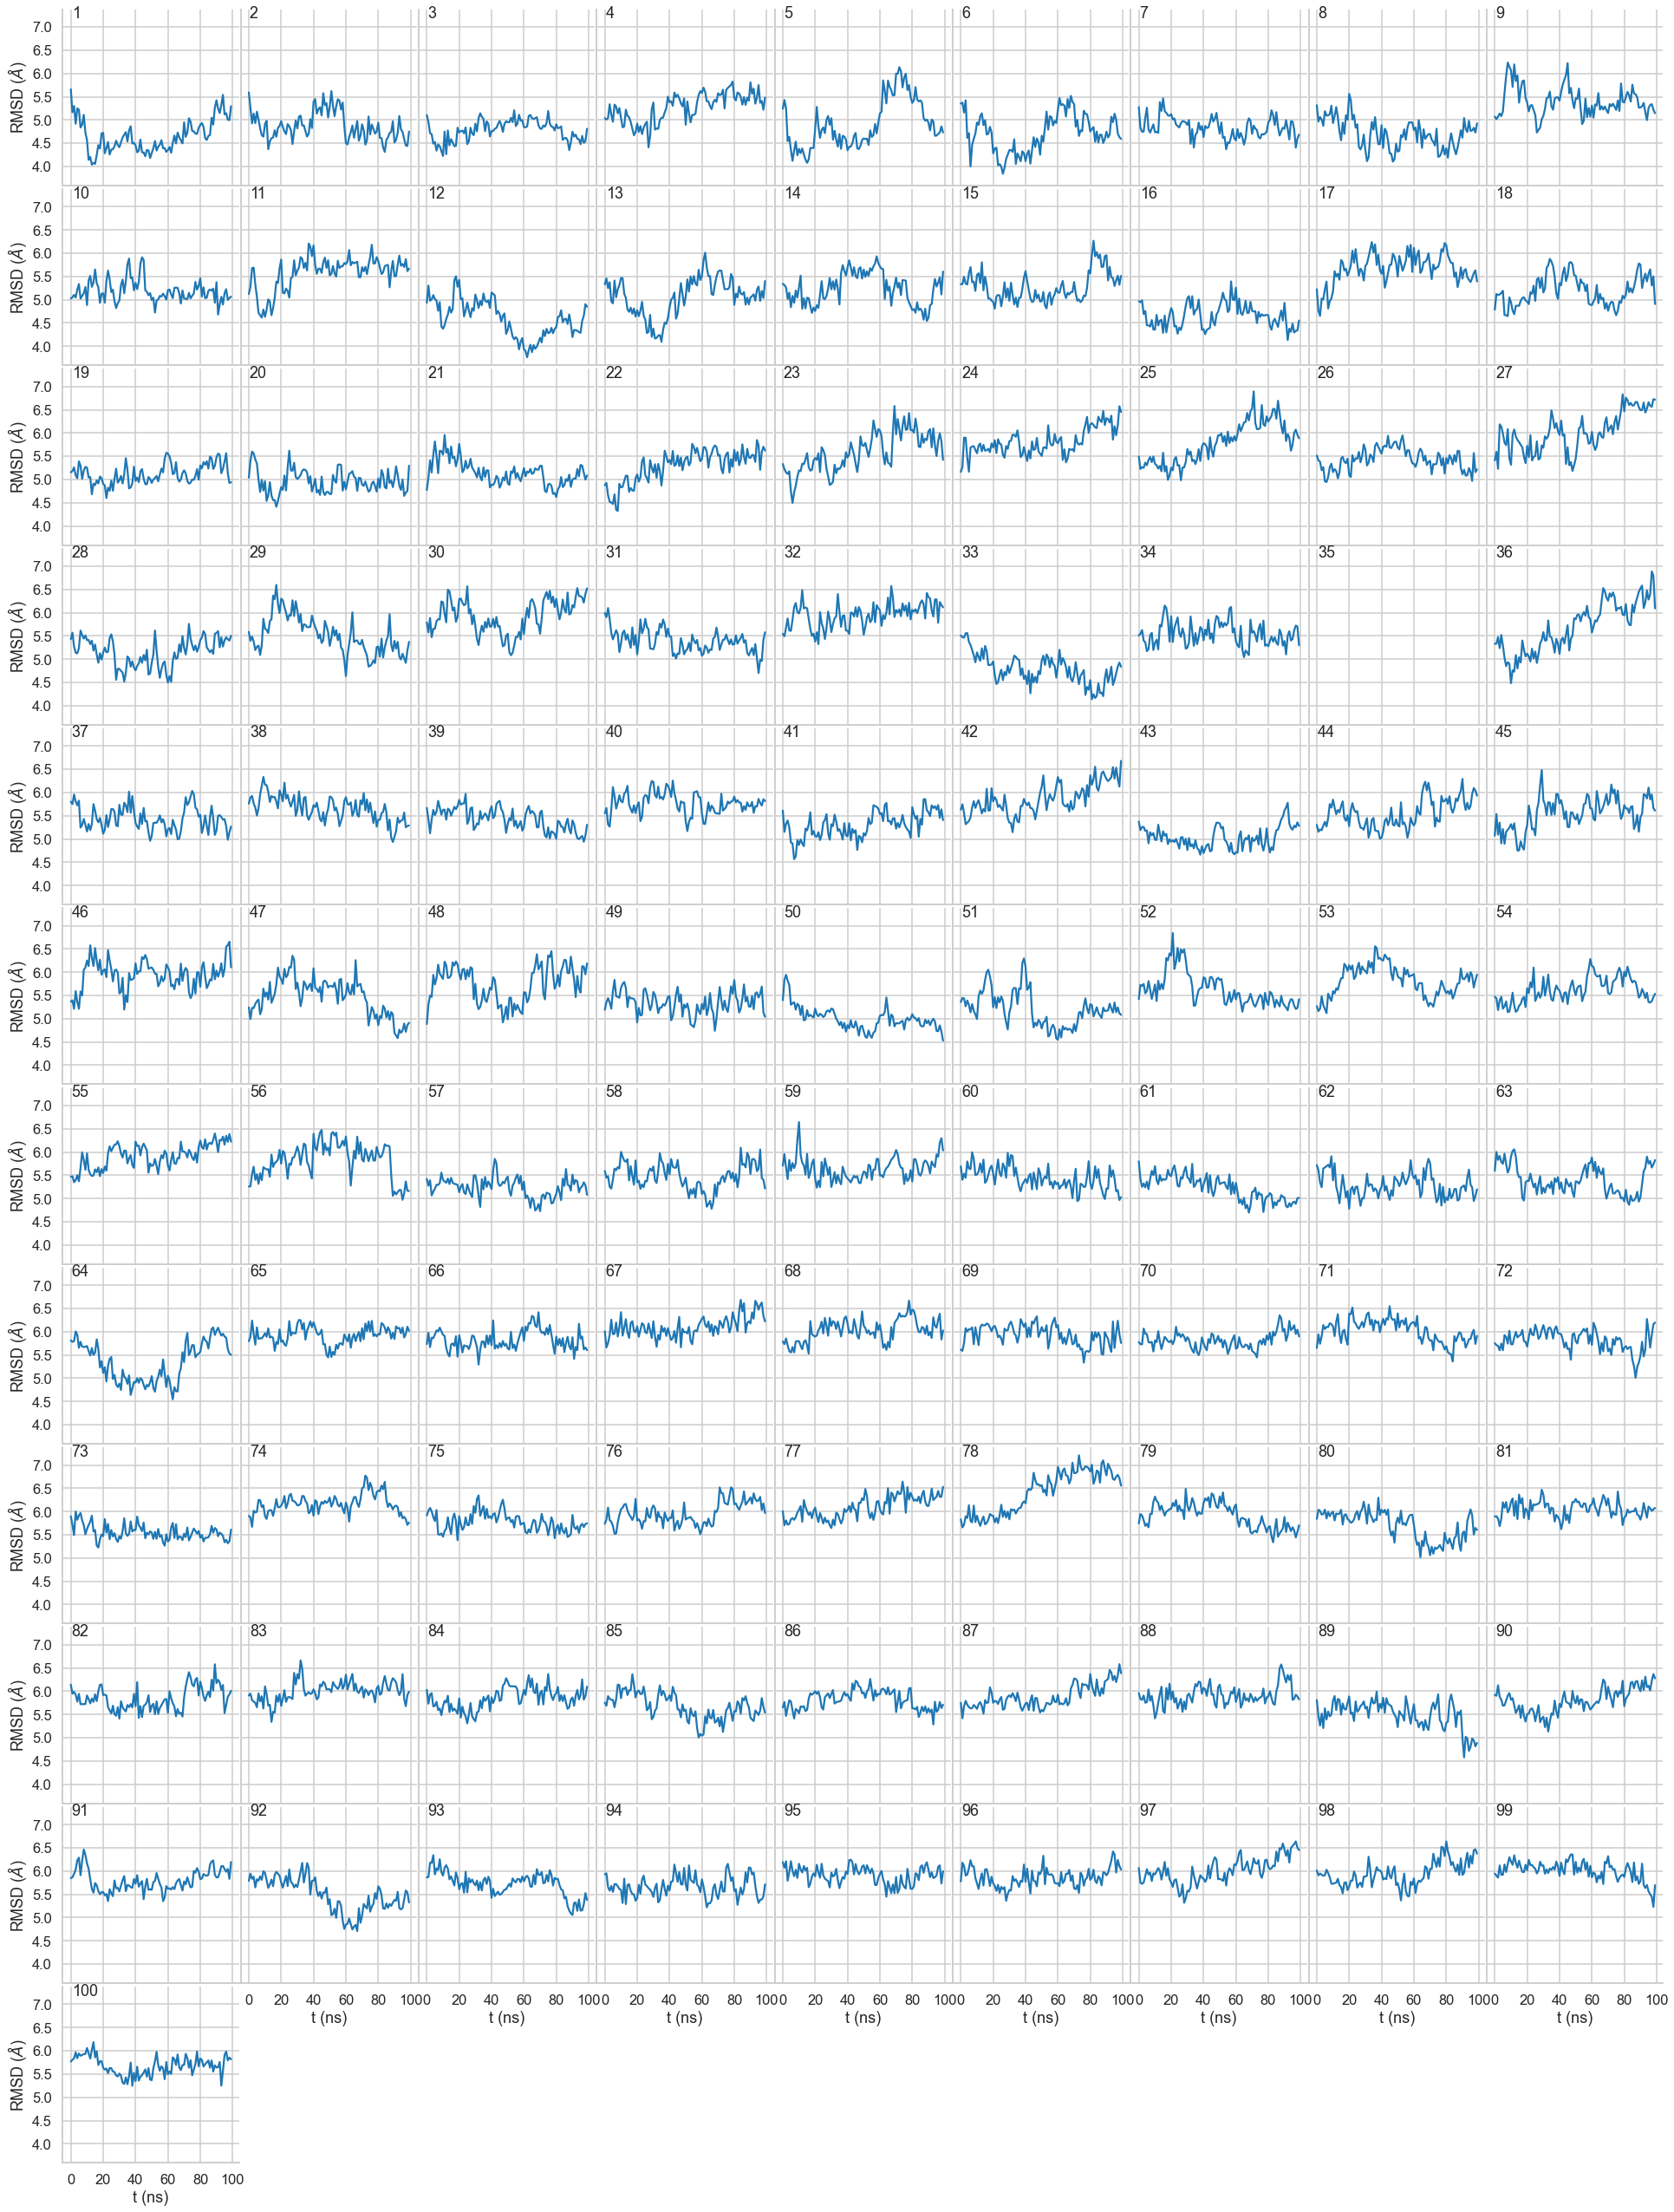

In [9]:
with sns.plotting_context('talk', font_scale=1):
    sns.set_style('whitegrid')
    g = sns.FacetGrid(data= df,col='Trajectory', col_wrap=9)
    g.map(plt.plot, 't (ns)', rms_lab)
    g.set_titles("")
    g.fig.subplots_adjust(hspace=0.02, wspace=0.01)
    for i, ax in enumerate(g.axes.flatten()):
        ax.annotate(str(i+1), xy=(0.05, 0.95), 
                    xycoords='axes fraction')
    plt.savefig('outputs/rmsd_ca_traj_vs_xtal.png', dpi=450, bbox_inches='tight')
    

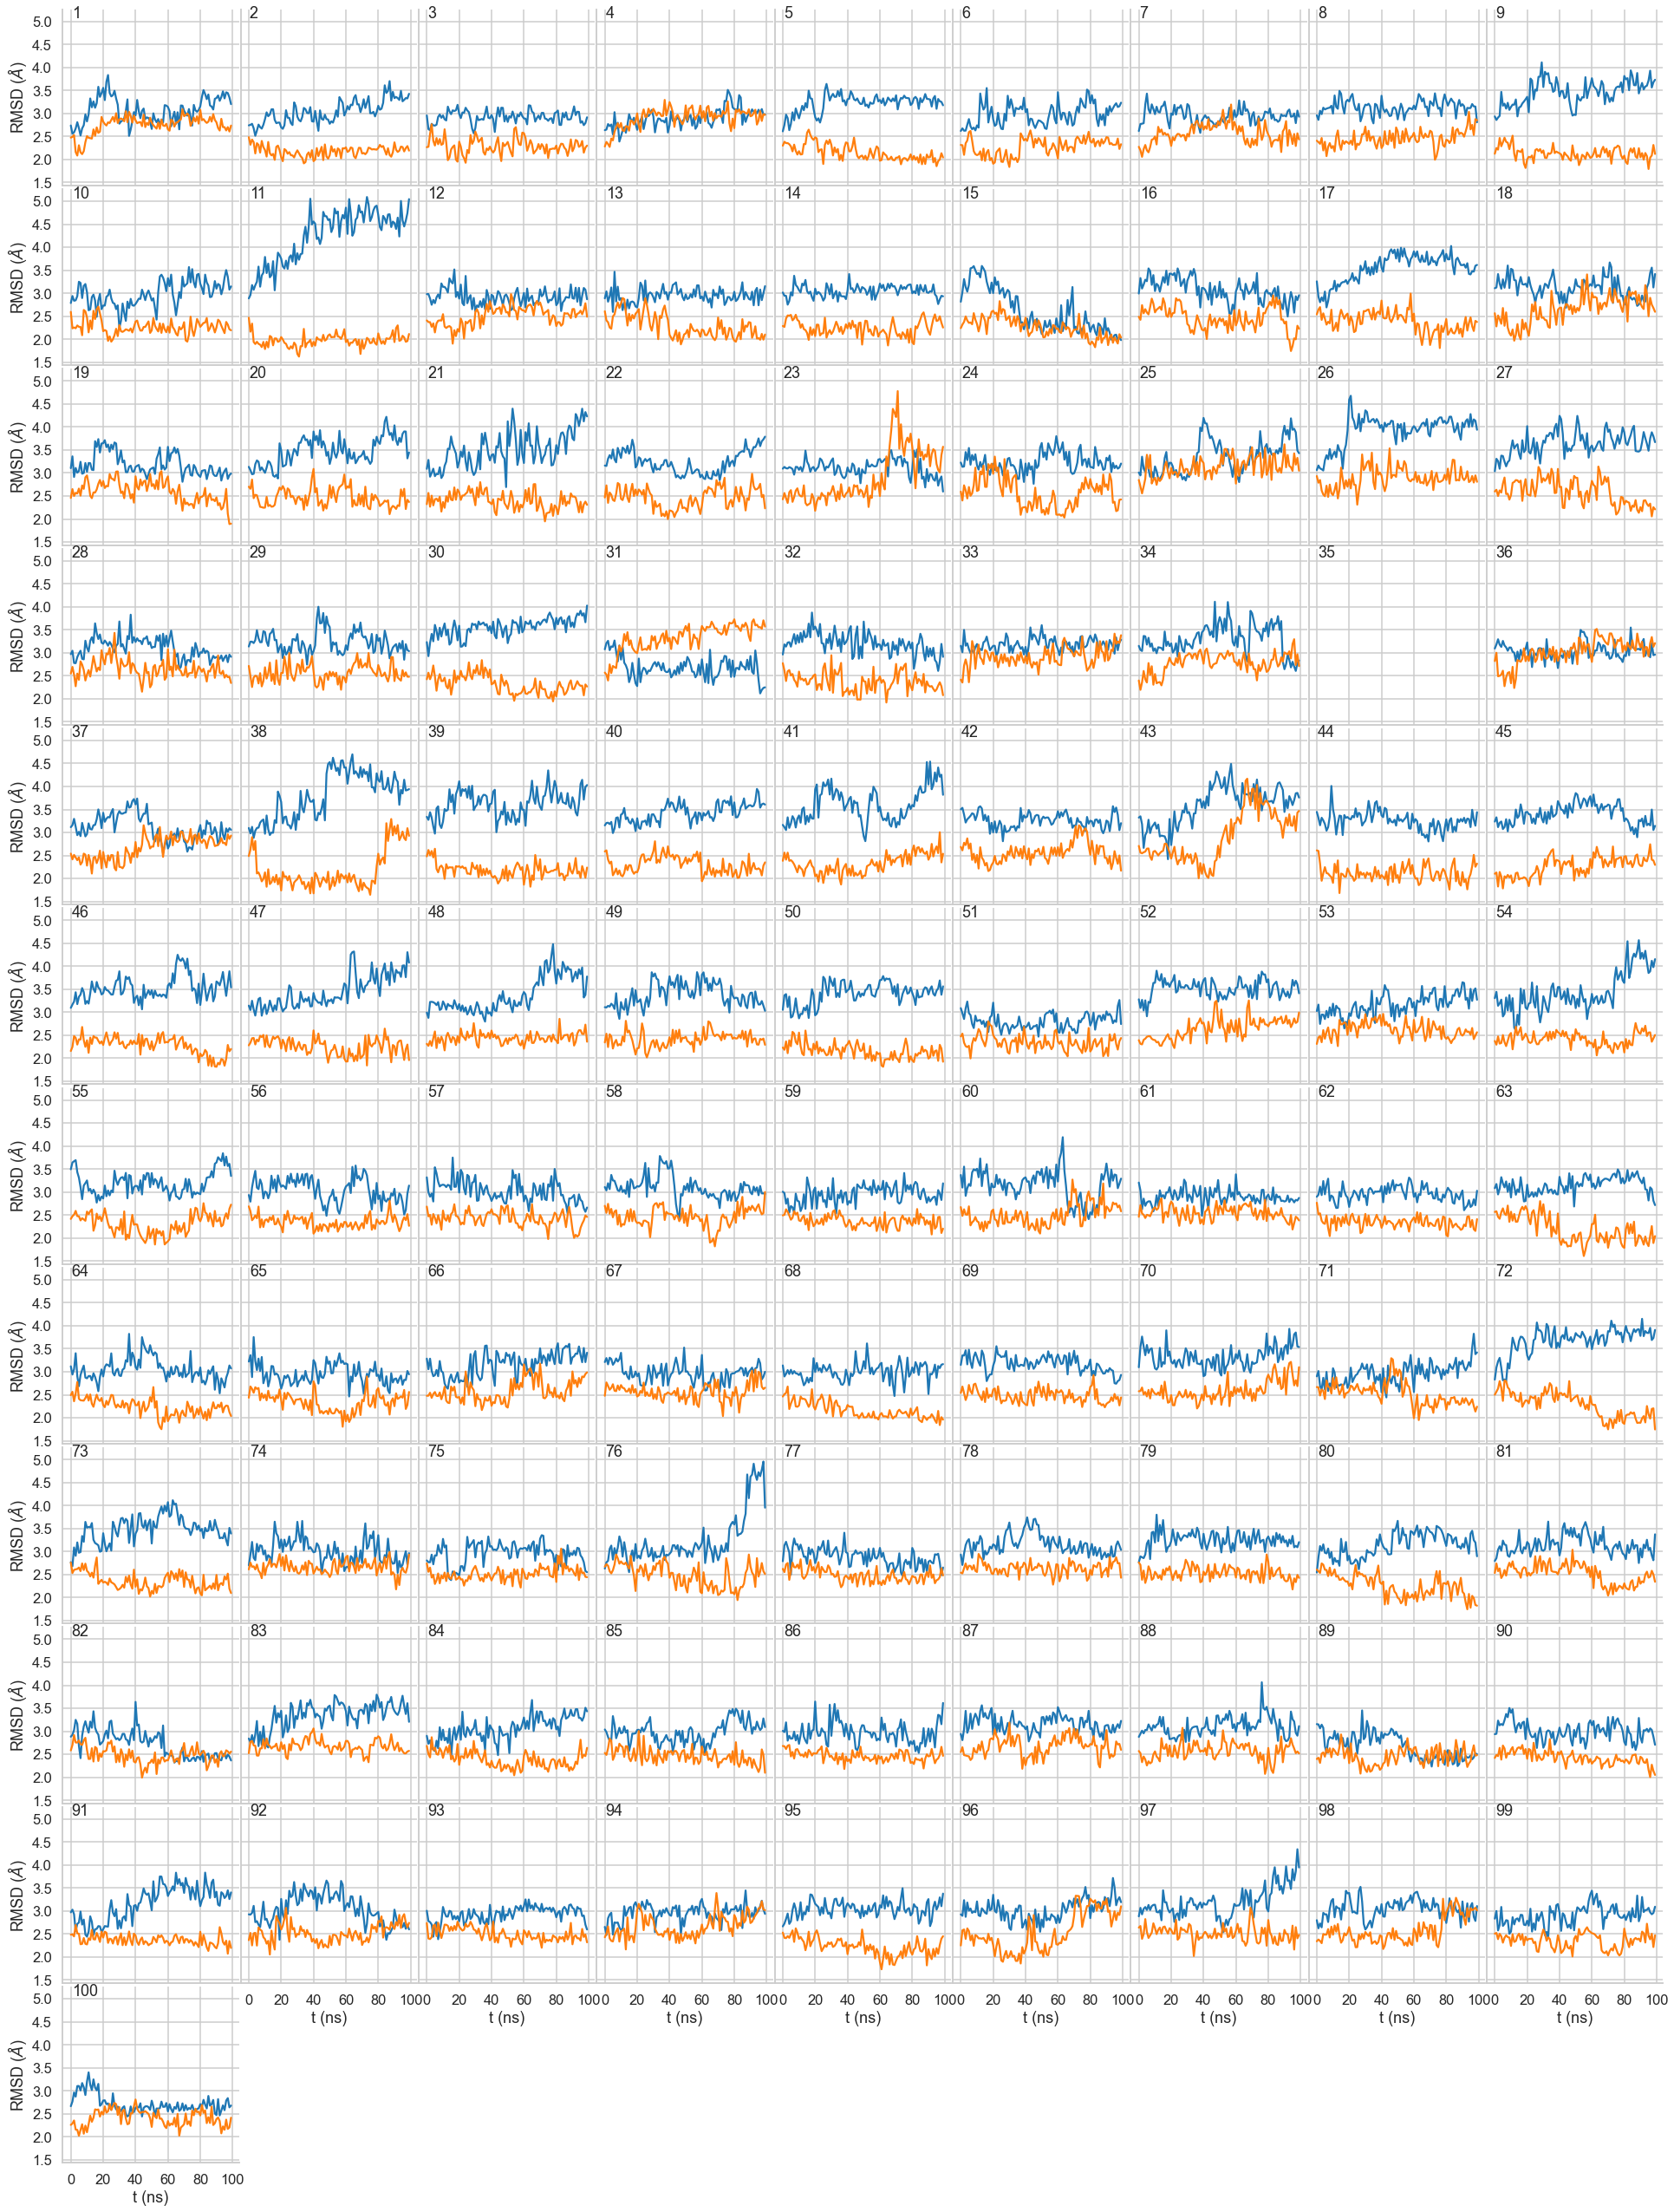

In [10]:
with sns.plotting_context('talk', font_scale=1):
    sns.set_style('whitegrid')
    g = sns.FacetGrid(data= df2, hue='Site', col='Trajectory', col_wrap=9)
    g.map(plt.plot, 't (ns)', rms_lab)
    g.set_titles("")
    g.fig.subplots_adjust(hspace=0.02, wspace=0.01)
    for i, ax in enumerate(g.axes.flatten()):
        ax.annotate(str(i+1), xy=(0.05, 0.95), 
                    xycoords='axes fraction')
    plt.savefig('outputs/rmsd_as_traj_vs_xtal.png', dpi=450, bbox_inches='tight')
    

## RMSD distribution

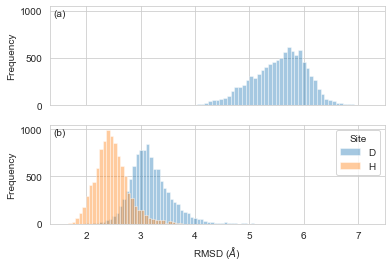

In [25]:
with sns.plotting_context(font_scale=1.25):
    fig, axes = plt.subplots(2, sharey=True, sharex=True)
    
    sns.distplot(df[rms_lab], kde=False, ax=axes[0], axlabel=False)
    axes[0].set_ylabel('Frequency')
    
    sns.distplot(df2.query('Site=="D"')[rms_lab], label='D', ax=axes[1], kde=False)
    sns.distplot(df2.query('Site=="H"')[rms_lab], label='H', ax=axes[1], kde=False)
    axes[1].legend(title='Site')
    axes[1].set_ylabel('Frequency')

    for i, ax in enumerate(axes.flatten()):
        ax.annotate(s='({})'.format(list('abcde')[i]), xy=(0.01, 0.9),
                    xycoords='axes fraction')
    plt.savefig('outputs/rmsd_dist.png', dpi=450, bbox_inches='tight')

## RMSD 0ps

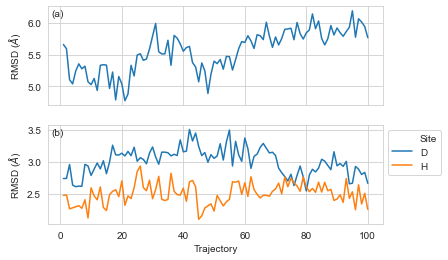

In [24]:
with sns.plotting_context(font_scale=1.5):
    fig, axes = plt.subplots(2, sharex=True, sharey=False)
    sns.lineplot(data=df.loc[df['t (ns)']==0, :], x='Trajectory', y=rms_lab, ax=axes[0])
    sns.lineplot(data=df2.loc[df2['t (ns)']==0, :], x='Trajectory', hue='Site',  
                 y=rms_lab, ax=axes[1])
    axes[1].legend(bbox_to_anchor=(1,1), loc='upper left')
    for i, ax in enumerate(axes.flatten()):
        ax.annotate(s='({})'.format(list('abcde')[i]), xy=(0.01, 0.9),
                    xycoords='axes fraction')
    plt.savefig('outputs/rmsd_0ps.png', dpi=450, bbox_inches='tight')

In [ ]:
df3.rename(columns={'RMSD_x': 'RMSD (AS)', 'RMSD_y': 'RMSD (Ca)'}, inplace=True)

In [ ]:
df3.head()

In [ ]:
with sns.plotting_context(font_scale=1.25):
#     g = sns.FacetGrid(df3, col='Site', hue='Site')
#     g.map(plt.scatter, 'RMSD (Ca)', 'RMSD (AS)', alpha=0.1)
    g = sns.lmplot(data=df3, col='Site', hue='Site', x='RMSD (Ca)', y='RMSD (AS)', 
              scatter_kws={'alpha': 0.1}, line_kws={'color':'k', 'alpha': 0.5}, 
                   legend_out=False, 
              legend=True)
    for i, ax  in enumerate(g.axes.flatten()):
        ax.annotate(s='({})'.format(list('abcdefg')[i]), xy=(0.05, 0.95), 
                    xycoords='axes fraction')
    g.set_titles('')